Using TensorFlow backend.
C:\Users\Usuario\Anaconda3\envs\prediccionventas\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Usuario\Anaconda3\envs\prediccionventas\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Usuario\Anaconda3\envs\prediccionventas\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users







Epoch 1/400
 - 0s - loss: 54447.5348
Epoch 2/400
 - 0s - loss: 34800.9670
Epoch 3/400
 - 0s - loss: 22553.4984
Epoch 4/400
 - 0s - loss: 12291.5080
Epoch 5/400
 - 0s - loss: 5323.8641
Epoch 6/400
 - 0s - loss: 2075.6578
Epoch 7/400
 - 0s - loss: 1080.6700
Epoch 8/400
 - 0s - loss: 942.5615
Epoch 9/400
 - 0s - loss: 922.6086
Epoch 10/400
 - 0s - loss: 910.0355
Epoch 11/400
 - 0s - loss: 911.8723
Epoch 12/400
 - 0s - loss: 919.5400
Epoch 13/400
 - 0s - loss: 904.8551
Epoch 14/400
 - 0s - loss: 900.7986
Epoch 15/400
 - 0s - loss: 909.9901
Epoch 16/400
 - 0s - loss: 912.3245
Epoch 17/400
 - 0s - loss: 906.1657
Epoch 18/400
 - 0s - loss: 904.3431
Epoch 19/400
 - 0s - loss: 906.2803
Epoch 20/400
 - 0s - loss: 921.0808
Epoch 21/400
 - 0s - loss: 901.6362
Epoch 22/400
 - 0s - loss: 885.3688
Epoch 23/400
 - 0s - loss: 897.1868
Epoch 24/400
 - 0s - loss: 899.6899
Epoch 25/400
 - 0s - loss: 899.3143
Epoch 26/400
 - 0s - loss: 908.1018
Epoch 27/400
 - 0s - loss: 891.5948
Epoch 28/400
 - 0s -

 - 0s - loss: 593.5091
Epoch 191/400
 - 0s - loss: 525.9084
Epoch 192/400
 - 0s - loss: 533.1130
Epoch 193/400
 - 0s - loss: 529.2288
Epoch 194/400
 - 0s - loss: 540.1113
Epoch 195/400
 - 0s - loss: 552.3816
Epoch 196/400
 - 0s - loss: 560.7813
Epoch 197/400
 - 0s - loss: 545.0207
Epoch 198/400
 - 0s - loss: 525.2447
Epoch 199/400
 - 0s - loss: 518.2411
Epoch 200/400
 - 0s - loss: 543.1364
Epoch 201/400
 - 0s - loss: 519.5932
Epoch 202/400
 - 0s - loss: 532.4988
Epoch 203/400
 - 0s - loss: 528.8977
Epoch 204/400
 - 0s - loss: 542.2701
Epoch 205/400
 - 0s - loss: 565.3125
Epoch 206/400
 - 0s - loss: 530.1222
Epoch 207/400
 - 0s - loss: 523.0801
Epoch 208/400
 - 0s - loss: 579.9705
Epoch 209/400
 - 0s - loss: 531.4642
Epoch 210/400
 - 0s - loss: 525.4610
Epoch 211/400
 - 0s - loss: 536.9845
Epoch 212/400
 - 0s - loss: 520.3345
Epoch 213/400
 - 0s - loss: 550.9007
Epoch 214/400
 - 0s - loss: 528.5583
Epoch 215/400
 - 0s - loss: 498.6412
Epoch 216/400
 - 0s - loss: 570.1345
Epoch 217/400
 

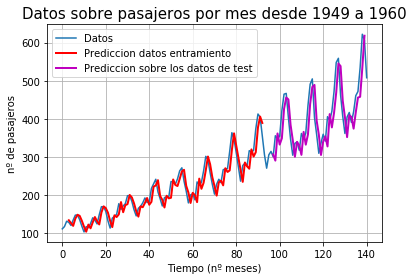

In [2]:
##### Perceptrón multicapa por el método de la ventana

# Perceptrón multicapa para predecir a los pasajeros de las aerolíneas internacionales (t+1, dado t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
# convertimos un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)
# semilla aleatoria para reproducibilidad
numpy.random.seed(7)
# cargamos el conjunto de datos
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python',skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# dividimos entre entranmiento y test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# remodelamos X=t y Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# crear y ajuste el modelo Perceptron multicapa
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)
# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Puntuacion de entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Puntuacion del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generacion de prediccion para el entreno
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones del test de cambio para plotear
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# ploteamos linea base y predicciones
plt.plot(dataset)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Datos sobre pasajeros por mes desde 1949 a 1960", fontsize = 15)
plt.xlabel("Tiempo (nº meses)", fontsize = 10)
plt.ylabel("nº de pasajeros", fontsize = 10)
plt.show()